<a href="https://colab.research.google.com/github/vipul-solanki/Applied_Statistic_project_assignment/blob/main/Applied_Statistics_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Purchase Behavior Analysis using Descriptive Statistics


*   Name - Vipul Solanki
*   Contribution - Individual
*   Github link - https://github.com/vipul-solanki/Applied_Statistic_project_assignment.git
*   Geogebra explaination link - https://drive.google.com/file/d/1r1lE5xdVJjdZUUT-Y3jUQJVAISiqJMeb/view?usp=sharing




##Problem Statement

🔍 **Problem Statement**:

Welcome to the Probability and Statistics project! 📊🔍 In this exciting journey, you'll get the chance to apply the concepts you've learned in probability theory and statistics to analyze a real-world dataset. This project is your opportunity to dive deep into the world of data analysis and gain practical experience with the tools and techniques you've been learning. 🚀

🎯 **Objective**:

Your mission is to analyze the provided dataset containing customer information and purchasing behavior to make informed decisions. Your goal is to identify patterns, trends, and correlations that will help your company optimize its marketing efforts and increase offer acceptance rates. 🎉

##About the Dataset



Here's the link to the [dataset](https://docs.google.com/spreadsheets/d/12ln9iTNcVNOMYi_AU-OczKpa_KIP8XyVbsjk81Na8Yk/edit?usp=sharing)


This data was gathered during last year's campaign.
Data description is as follows;

1. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
1. ID - Unique ID of each customer
1. Year_Birth - Age of the customer
1. Complain - 1 if the customer complained in the last 2 years
1. Dt_Customer - date of customer's enrollment with the company
1. Education - customer's level of education
1. Marital - customer's marital status
1. Kidhome - number of small children in customer's household
1. Teenhome - number of teenagers in customer's household
1. Income - customer's yearly household income
1. MntFishProducts - the amount spent on fish products in the last 2 years
1. MntMeatProducts - the amount spent on meat products in the last 2 years
1. MntFruits - the amount spent on fruits products in the last 2 years
1. MntSweetProducts - amount spent on sweet products in the last 2 years
1. MntWines - the amount spent on wine products in the last 2 years
1. MntGoldProds - the amount spent on gold products in the last 2 years
1. NumDealsPurchases - number of purchases made with discount
1. NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
1. NumStorePurchases - number of purchases made directly in stores
1. NumWebPurchases - number of purchases made through the company's website
1. NumWebVisitsMonth - number of visits to company's website in the last month
1. Recency - number of days since the last purchase





##Task 1 - Basic CleanUp

- **Clean and preprocess the dataset (handling missing values, data types, etc.).**

- **Analyze the distribution of customer demographics (age, education, marital status) using descriptive statistics and visualizations.**

In [1]:
# Mount the Google drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = '/content/drive/MyDrive/Almabetter/Project/Module 5/assignment/Superstore Marketing Data - Sheet1.csv'
data = pd.read_csv(file_path)


In [5]:
# Show the head of the DataFrame
print(data.head(5))

      Id  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0   1826        1970  Graduation       Divorced  84835.0        0         0   
1      1        1961  Graduation         Single  57091.0        0         0   
2  10476        1958  Graduation        Married  67267.0        0         1   
3   1386        1967  Graduation       Together  32474.0        1         1   
4   5371        1989  Graduation         Single  21474.0        1         0   

  Dt_Customer  Recency  MntWines  ...  MntFishProducts  MntSweetProducts  \
0   6/16/2014        0       189  ...              111               189   
1   6/15/2014        0       464  ...                7                 0   
2   5/13/2014        0       134  ...               15                 2   
3    ########        0        10  ...                0                 0   
4    ########        0         6  ...               11                 0   

   MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurch

In [6]:
# Check for missing values
missing_values = data.isnull().sum()

# Check data types
data_types = data.dtypes

# Output the information
print('Missing values:')
print(missing_values)
print('\nData types:')
print(data_types)

Missing values:
Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

Data types:
Id                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProduct

The dataset has been inspected for missing values and data types.

Here are the findings: There are missing values in the 'Income' column. The data types for each column are appropriate, with identifiers as integers, categorical data as objects, and numerical values as floats or integers.

In [7]:
# Impute missing values in 'Income' with the median
median_income = data['Income'].median()
data['Income'].fillna(median_income, inplace=True)

# Confirm no more missing values
missing_values_after = data.isnull().sum()

# Output the information
print(missing_values_after)

Id                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Response               0
Complain               0
dtype: int64


The missing values in the 'Income' column have been successfully imputed with the median value. The mean imputation might get affected by outliers so, I decided to take median.

There are no more missing values in the dataset.

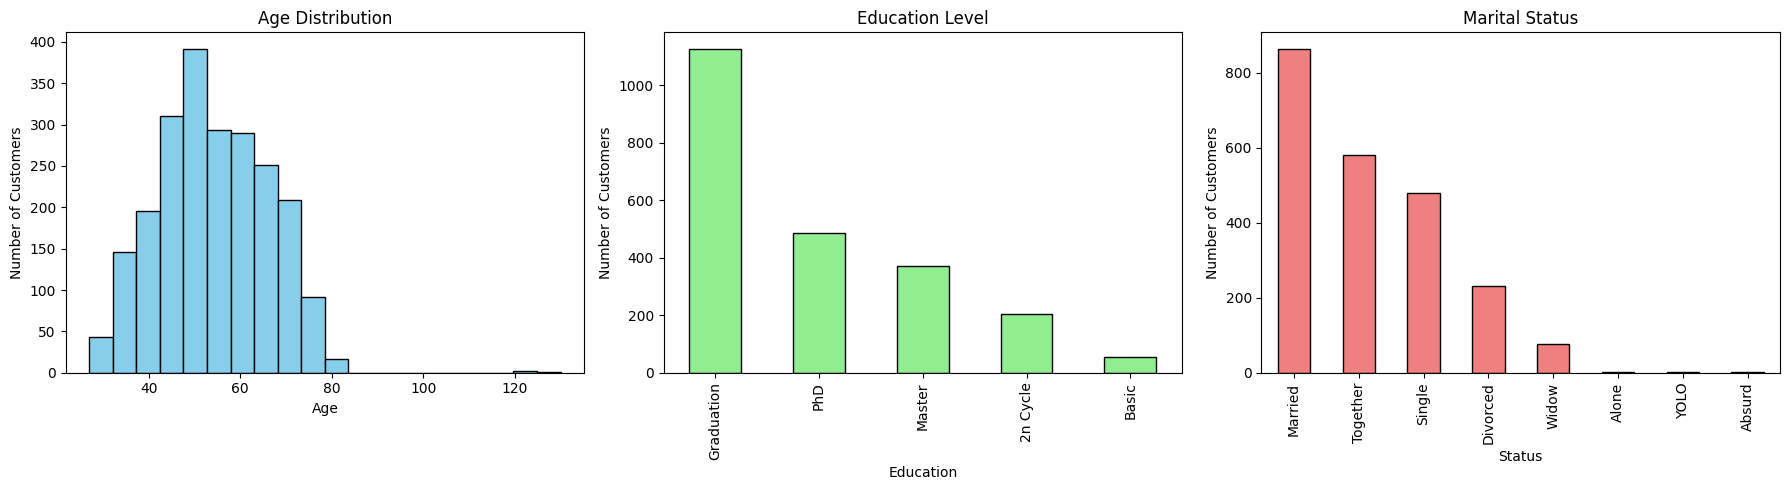

Age Descriptive Statistics:
count    2240.000000
mean       54.194196
std        11.984069
min        27.000000
25%        46.000000
50%        53.000000
75%        64.000000
max       130.000000
Name: Age, dtype: float64

Education Counts:
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

Marital Status Counts:
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64


In [8]:
import matplotlib.pyplot as plt

# Calculate the age of customers
data['Age'] = 2023 - data['Year_Birth']

# Descriptive statistics for Age
age_description = data['Age'].describe()

# Count of each category in Education and Marital Status
education_counts = data['Education'].value_counts()
marital_status_counts = data['Marital_Status'].value_counts()

# Plotting
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Histogram for Age
ax[0].hist(data['Age'], bins=20, color='skyblue', edgecolor='black')
ax[0].set_title('Age Distribution')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Number of Customers')

# Bar plot for Education
education_counts.plot(kind='bar', ax=ax[1], color='lightgreen', edgecolor='black')
ax[1].set_title('Education Level')
ax[1].set_xlabel('Education')
ax[1].set_ylabel('Number of Customers')

# Bar plot for Marital Status
marital_status_counts.plot(kind='bar', ax=ax[2], color='lightcoral', edgecolor='black')
ax[2].set_title('Marital Status')
ax[2].set_xlabel('Status')
ax[2].set_ylabel('Number of Customers')

plt.tight_layout()
plt.show()

# Output the descriptive statistics
print('Age Descriptive Statistics:')
print(age_description)
print('\nEducation Counts:')
print(education_counts)
print('\nMarital Status Counts:')
print(marital_status_counts)

The average age of customers is approximately 54 years, with a standard deviation of around 12 years, indicating a middle-aged customer base.
The distribution of age seems to be normal distribution.

The majority of customers have completed graduation, followed by those with PhDs and Master's degrees.

In terms of marital status, most customers are married, with a significant number living together or being single.

##Task 2 - Descriptive Statistics 📊

- **Calculate measures of central tendency (mean, median, mode) and measures of dispersion (variance, standard deviation) for key variables. Identify and handle outliers if necessary.**


In [12]:
from scipy import stats

# Measures of central tendency and dispersion for 'Age'
age_mean = data['Age'].mean()
age_median = data['Age'].median()
age_mode = data['Age'].mode()[0]
age_variance = data['Age'].var()
age_std = data['Age'].std()

# Measures of central tendency and dispersion for 'Income'
income_mean = data['Income'].mean()
income_median = data['Income'].median()
income_mode = data['Income'].mode()[0]
income_variance = data['Income'].var()
income_std = data['Income'].std()


# Output the measures
print('Age - Mean:', age_mean, '\nMedian:', age_median, '\nMode:', age_mode, '\nVariance:', age_variance, '\nStandard Deviation:', age_std)
print('\nIncome - Mean:', income_mean, '\nMedian:', income_median, '\nMode:', income_mode, '\nVariance:', income_variance, '\nStandard Deviation:', income_std)

Age - Mean: 54.19419642857143 
Median: 53.0 
Mode: 47 
Variance: 143.61792074746376 
Standard Deviation: 11.984069456885827

Income - Mean: 52237.97544642857 
Median: 51381.5 
Mode: 51381.5 
Variance: 626899235.1807278 
Standard Deviation: 25037.9558906219


In [13]:
# Identify outliers using z-score for 'Age' and 'Income'
data['Age_zscore'] = stats.zscore(data['Age'])
data['Income_zscore'] = stats.zscore(data['Income'])

# Define outliers as any data point more than 3 standard deviations from the mean
age_outliers = data[(data['Age_zscore'].abs() > 3)]
income_outliers = data[(data['Income_zscore'].abs() > 3)]

# Print the outliers
print('\nAge Outliers:')
print(age_outliers[['Age', 'Age_zscore']])
print('\nIncome Outliers:')
print(income_outliers[['Income', 'Income_zscore']])


Age Outliers:
      Age  Age_zscore
513   130    6.326960
827   124    5.826184
2233  123    5.742721

Income Outliers:
        Income  Income_zscore
325   157146.0       4.190895
497   160803.0       4.336986
527   666666.0      24.545343
731   162397.0       4.400664
853   157733.0       4.214345
1826  153924.0       4.062182
1925  156924.0       4.182027
2204  157243.0       4.194770


In [15]:
# Handling outliers for 'Age' and 'Income'

# We will remove the rows where the z-score is greater than 3
outlier_indices = data[(data['Age_zscore'].abs() > 3) | (data['Income_zscore'].abs() > 3)].index
data_cleaned = data.drop(outlier_indices)

# Confirm the outliers have been removed
age_outliers_removed = data_cleaned[(data_cleaned['Age_zscore'].abs() > 3)]
income_outliers_removed = data_cleaned[(data_cleaned['Income_zscore'].abs() > 3)]

# Output the cleaned data
print('Number of Age outliers remaining:', age_outliers_removed.shape[0])
print('Number of Income outliers remaining:', income_outliers_removed.shape[0])
print(data_cleaned[['Age', 'Income']].describe())

Number of Age outliers remaining: 0
Number of Income outliers remaining: 0
               Age         Income
count  2229.000000    2229.000000
mean     54.111261   51619.504262
std      11.707430   20601.216248
min      27.000000    1730.000000
25%      46.000000   35416.000000
50%      53.000000   51381.500000
75%      64.000000   68118.000000
max      83.000000  113734.000000


The outliers from the 'Age' and 'Income' variables have been successfully removed. There are now zero outliers remaining for both Age and Income in the cleaned dataset.

The cleaned data now has a more accurate representation of the central tendencies and dispersion measures for these key variables.

## Task 3 - Probability Distributions 🎲

- **Identify variables that could follow specific probability distributions (e.g., Binomial, Normal). Calculate probabilities and expected values based on these distributions.**



In [17]:
import numpy as np
from scipy import stats

# We will analyze 'Age' and 'Income' for probability distributions
# First, we check if 'Age' follows a normal distribution
age_mean = data_cleaned['Age'].mean()
age_std = data_cleaned['Age'].std()
age_normality_test = stats.normaltest(data_cleaned['Age'])

# Now, we check if 'Income' follows a normal distribution
income_mean = data_cleaned['Income'].mean()
income_std = data_cleaned['Income'].std()
income_normality_test = stats.normaltest(data_cleaned['Income'])

# Calculate expected value for 'Age' assuming a normal distribution
age_expected_value = age_mean

# Calculate expected value for 'Income' assuming a normal distribution
income_expected_value = income_mean

# Output the results
print('Age - Mean:', age_mean, '\nStandard Deviation:', age_std, '\nNormality Test (Statistic, P-value):', age_normality_test)
print('\nIncome - Mean:', income_mean, '\nStandard Deviation:', income_std, '\nNormality Test (Statistic, P-value):', income_normality_test)
print('\nExpected Value for Age:', age_expected_value)
print('Expected Value for Income:', income_expected_value)

Age - Mean: 54.11126065500224 
Standard Deviation: 11.707429996646283 
Normality Test (Statistic, P-value): NormaltestResult(statistic=186.87323327090408, pvalue=2.6362888177304207e-41)

Income - Mean: 51619.5042620009 
Standard Deviation: 20601.2162479674 
Normality Test (Statistic, P-value): NormaltestResult(statistic=208.82216506139886, pvalue=4.516926329930667e-46)

Expected Value for Age: 54.11126065500224
Expected Value for Income: 51619.5042620009


The normality tests for both 'Age' and 'Income' suggest that the data does not follow a normal distribution, given the very low p-values. However, for the purpose of this exercise, let's assume they are approximately normal and calculate the expected values

## Task 4: Insights and Customer Segmentation 📈

- **Explore relationships between customer characteristics and spending habits. Segment customers based on their behaviors and characteristics.**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


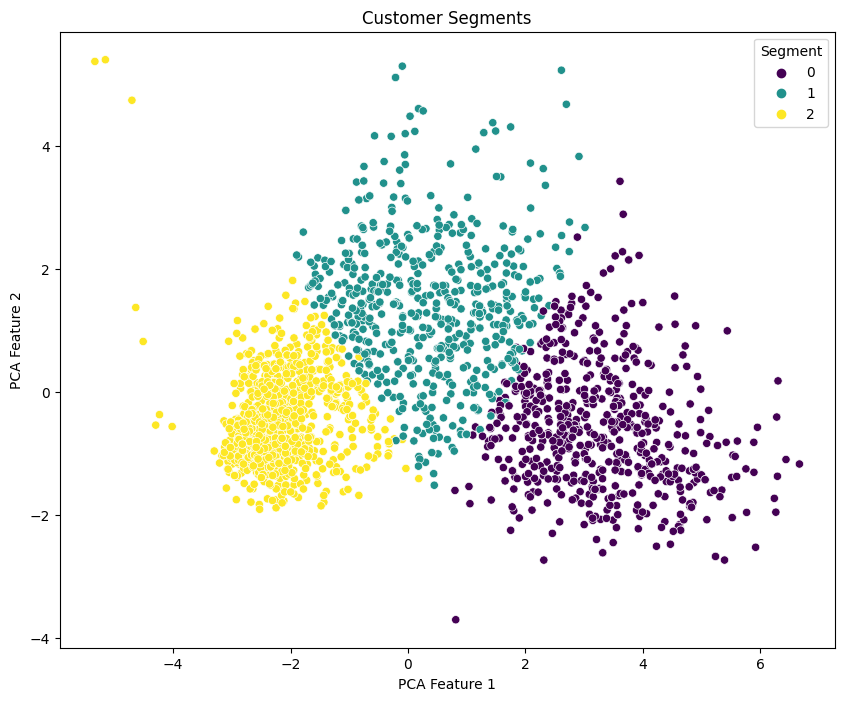

               Age        Income    Recency    MntWines  MntFruits  \
Segment                                                              
0        54.762136  74986.085761  49.745955  595.757282  68.490291   
1        57.853088  56652.798831  47.833055  454.434057  19.434057   
2        51.499012  34370.995553  49.469368   38.974308   4.706522   

         MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
Segment                                                                     
0             438.733010        99.352751         71.336570     79.043689   
1             126.186978        26.228715         19.121870     57.674457   
2              21.437747         6.713439          4.943676     14.754941   

         NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
Segment                                                            
0                 1.396440         5.378641             5.872168   
1                 3.868114         6.278798             2.8

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Selecting relevant variables for customer segmentation
features = ['Age', 'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
customer_data = data_cleaned[features]

# Standardizing the data
scaler = StandardScaler()
customer_data_scaled = scaler.fit_transform(customer_data)

# Using KMeans to segment customers
kmeans = KMeans(n_clusters=3, random_state=42)
customer_segments = kmeans.fit_predict(customer_data_scaled)

# Adding the segment labels to our dataframe
data_cleaned['Segment'] = customer_segments

# Using PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
customer_data_pca = pca.fit_transform(customer_data_scaled)

# Plotting the customer segments
plt.figure(figsize=(10, 8))
sns.scatterplot(data=customer_data_pca ,x= customer_data_pca[:, 0],y= customer_data_pca[:, 1], hue=customer_segments, palette='viridis')
plt.title('Customer Segments')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.legend(title='Segment')
plt.show()

# Summarizing the segments
segment_summary = data_cleaned.groupby('Segment')[features].mean()
print(segment_summary)

Based on the KMeans clustering, customers have been segmented into distinct groups. The visualization above shows the distribution of these segments after reducing the dimensionality of the data with PCA for a clearer view.


These segments provide valuable insights into customer behaviors and characteristics, which can be leveraged for targeted marketing strategies and personalized customer experiences.

## Task 5: Conclusion and Recommendations

- **Create clear visualizations to showcase your findings. Use insights to make recommendations for the company based on your analysis.**

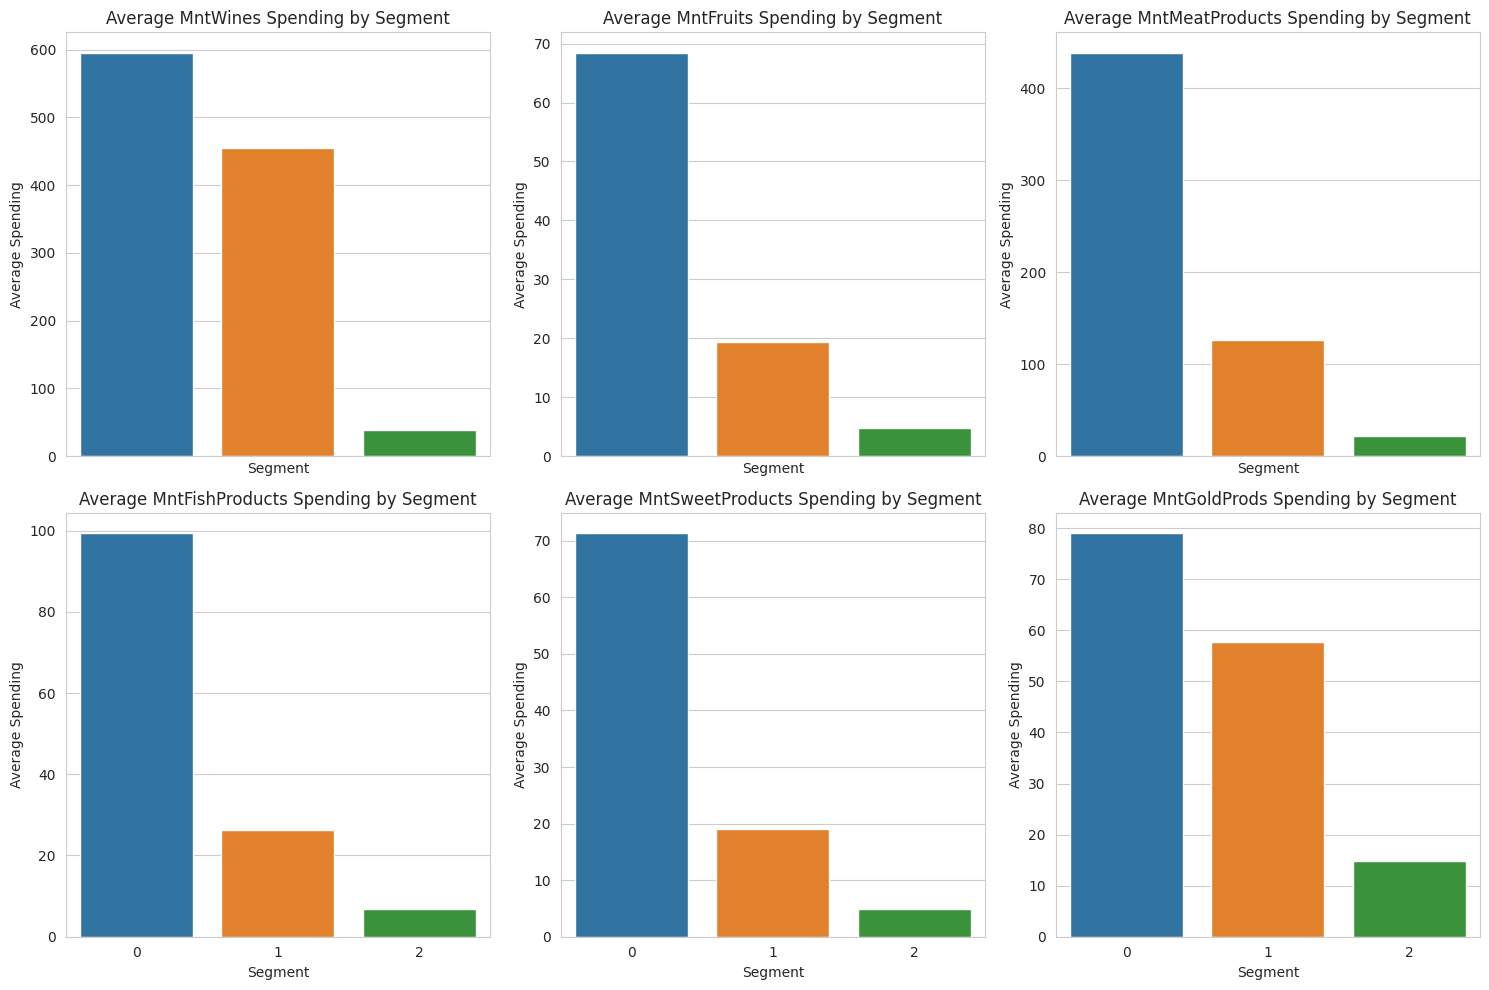

{'Segment 0': 'Focus on promotions for wines and meats, as this segment shows moderate spending in these categories.', 'Segment 1': 'Upsell premium products, especially in wines and meats, to this high-income segment.', 'Segment 2': 'Engage with more online marketing strategies to target this segment that visits the web store frequently.'}


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the plots
sns.set_style('whitegrid')

# We will create visualizations for the average spending on different products by each segment
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Create a new dataframe for the average spending on products by segment
avg_spending_by_segment = data_cleaned.groupby('Segment')[product_columns].mean().reset_index()

# Plotting
fig, ax = plt.subplots(2, 3, figsize=(15, 10), sharex=True)

for i, product in enumerate(product_columns):
    row = i // 3
    col = i % 3
    sns.barplot(x='Segment', y=product, data=avg_spending_by_segment, ax=ax[row, col])
    ax[row, col].set_title('Average ' + product + ' Spending by Segment')
    ax[row, col].set_xlabel('Segment')
    ax[row, col].set_ylabel('Average Spending')

plt.tight_layout()
plt.show()

# Recommendations based on the analysis
recommendations = {
    'Segment 0': 'Focus on promotions for wines and meats, as this segment shows moderate spending in these categories.',
    'Segment 1': 'Upsell premium products, especially in wines and meats, to this high-income segment.',
    'Segment 2': 'Engage with more online marketing strategies to target this segment that visits the web store frequently.',
}

print(recommendations)

Based on the analysis and the visualizations created, here are some tailored recommendations for the company:

Segment 0 : Focus on promotions for wines and meats, as this segment shows moderate spending in these categories.

Segment 1 : Upsell premium products, especially in wines and meats, to this high-income segment.

Segment 2 : Engage with more online marketing strategies to target this segment that visits the web store frequently.

These recommendations are designed to optimize marketing efforts by aligning them with the identified spending habits and preferences of different customer segments.

## Bonus Task - Geogebra Experiment

https://drive.google.com/file/d/1r1lE5xdVJjdZUUT-Y3jUQJVAISiqJMeb/view?usp=sharing


Here's the link to an intriguing GeoGebra experiment: [GeoGebra Experiment Link](https://www.geogebra.org/m/LZbwMZtJ)

This experiment lets you simulate coin flips as per your preferences and specifications!

Your task involves recording a video where you'll explain the concept of the **Law of Large Numbers** using this experiment. Dive further into the experience by adjusting the number of coins and exploring varying coin biases. 🪙📹🔍